### Analyzing "Medical Appointment No Shows"


#### In this notebook, it will visualize what information is content in the health appointments and the relation with no show events. 
#### There is some variables that can be useful to understand what makes (or not) to people from attend or not to their health appointments. In this notebook, you will visualize those behaviour along with some conclusions about that.
#### There is some problems with the age field, so this code handle that data wranglid, but in general there is no nan values or similar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import time

%matplotlib inline

pd.options.display.max_rows = 200

ns = pd.read_csv("KaggleV2-May-2016.csv")


In [2]:
display (ns)
display (ns.shape)

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2       2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3       2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
...                      ...  ...                ...          ...   
110522  2016-06-07T00:00:00Z   56        MARIA ORTIZ            0   
110523  2016-06-07T00:00:00Z   51        MARIA ORTIZ            0   
110524  2016-06-07T00:00:00Z   21        MARIA ORTIZ            0   
110525  2016-06-07T00:00:00Z   38        MARIA ORTIZ            0   
110526  2016-06-07T00:00:00Z   54        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0                  1         0           0        0             0      No  
1                  0         0           0        0             0      No  
2                  0         0           0        0             0      No  
3                  0         0           0        0             0      No  
4                  1         1           0        0             0      No  
...              ...       ...         ...      ...           ...     ...  
110522             0         0           0        0             1      No  
110523             0         0           0        0             1      No  
110524             0         0           0        0             1      No  
110525             0         0           0        0             1      No  
110526             0         0           0        0             1      No  

[110527 rows x 14 columns]

(110527, 14)

In [3]:
display( ns.describe())
display( ns["No-show"].describe())
display( ns["No-show"].value_counts())




PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

count     110527
unique         2
top           No
freq       88208
Name: No-show, dtype: object

No     88208
Yes    22319
Name: No-show, dtype: int64

In [4]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Note: 
Do not have null values in any of the columns, so we skip the fillna step

## 1. First, will graph numerical variables to see how scattered are the data

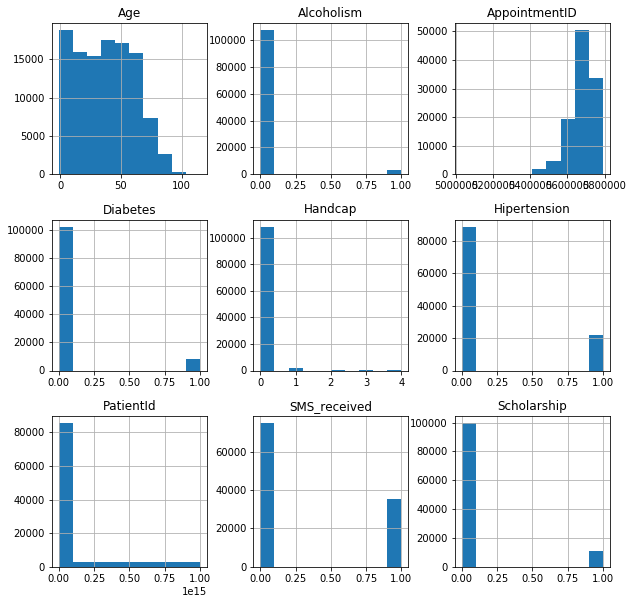

In [5]:
ns.hist(figsize=(10,10));

### No show variable is categorical, will transform to numerical through a function, and then graph this variable itself

In [3]:
#Transform No Show variable (target) to numeric
def noshow_num(var):
    if var == "Yes":
        NS = 1
    else:
        NS = 0
    return NS

ns["NS"] = ns["No-show"].apply(noshow_num)
ns.drop("No-show", axis=1, inplace = True)


0    79.806744
1    20.193256
Name: NS, dtype: float64

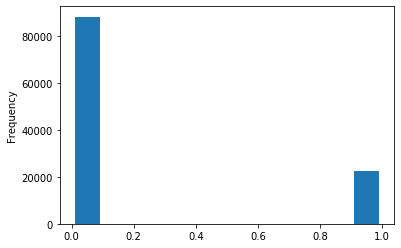

In [14]:
ns["NS"].plot.hist(bins= 10, rwidth = 0.8)
ns["NS"].value_counts(normalize=True).sort_index()*100


Around 20% of the data has a "no-show" value and the remaining 80% effectively attends to their health appointment

## 2. Drop some columns and create new ones
- Not use AppointmentID 
- Keep PatientID just to analyze some cases if necessary 
- From dates of appointment, will create new fields, like year, month, and day of the week
- Create a new field called Distance (in days), from schedule and appointment, want to see if urgent or programmed health examination makes a difference
- Inspect Age variable to validate that values are correct

In [4]:
# Dates come in string format, need to select partial text to create new variables
# Example: 2016-04-29T18:38:08Z

ns["Date_Scheduled"] = pd.to_datetime(ns["ScheduledDay"].str.slice(start=0, stop = 10), format = "%Y-%m-%d")
ns["Date_Appointment"] = ns["AppointmentDay"].astype('datetime64[ns]')

ns["distance"] = (ns["Date_Appointment"] - ns["Date_Scheduled"]).dt.days

ns["year_scheduled"] = ns['ScheduledDay'].str.slice(start = 0, stop = 4).astype(int)
ns["month_scheduled"] = ns['ScheduledDay'].str.slice(start = 6, stop = 7).astype(int)
ns["day_scheduled"] = ns['ScheduledDay'].str.slice(start = 9, stop = 10).astype(int)

ns["year_appointment"] = ns['AppointmentDay'].str.slice(start = 0, stop = 4).astype(int)
ns["month_appointment"] = ns['AppointmentDay'].str.slice(start = 6, stop = 7).astype(int)
ns["day_appointment"] = ns['AppointmentDay'].str.slice(start = 9, stop = 10).astype(int)



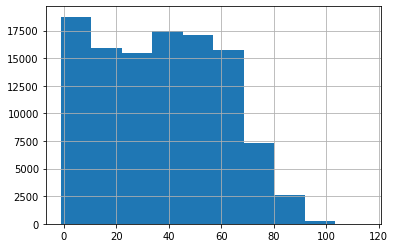

In [29]:
# Inspect Age variable
ns["Age"].hist();

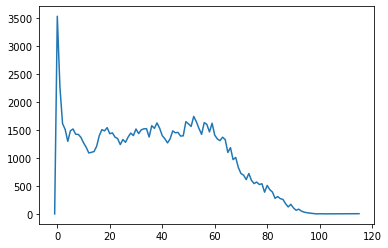

In [38]:
age_data = ns["Age"].value_counts().sort_index(ascending = True)
#display(age_data)
plt.plot(age_data);

#### There is a lot of people with age = 0, maybe null values have been replaced with zero values, it can be changed by the mean of the dataset

In [5]:
#ns_aux = np.mean(ns["Age"])

def replace_age(e):
    if e == 0 or e == 1 or e == -1:
        return np.nan
    else:
        return e
ns["Age"] = ns["Age"].apply(replace_age)


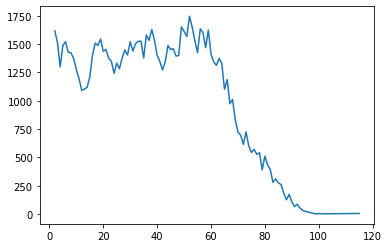

In [6]:
age_data = ns["Age"].value_counts().sort_index(ascending = True)
#display(age_data)
plt.plot(age_data);

In [7]:
avg_age = np.nanmean(ns["Age"])
#print("Average age is "  + str(avg_age))
print("Average age is "+ str(avg_age))

Average age is 39.12609584200776


Average age is 39.12609584200776


2.0      1618
3.0      1513
4.0      1299
5.0      1489
6.0      1521
7.0      1427
8.0      1424
9.0      1372
10.0     1274
11.0     1195
12.0     1092
13.0     1103
14.0     1118
15.0     1211
16.0     1402
17.0     1509
18.0     1487
19.0     1545
20.0     1437
21.0     1452
22.0     1376
23.0     1349
24.0     1242
25.0     1332
26.0     1283
27.0     1377
28.0     1448
29.0     1403
30.0     1521
31.0     1439
32.0     1505
33.0     1524
34.0     1526
35.0     1378
36.0     1580
37.0     1533
38.0     1629
39.0     1536
40.0     1402
41.0     1346
42.0     1272
43.0     1344
44.0     1487
45.0     1453
46.0     1460
47.0     1394
48.0     1399
49.0     1652
50.0     1613
51.0     1567
52.0     1746
53.0     1651
54.0     1530
55.0     1425
56.0     1635
57.0     1603
58.0     1469
59.0     1624
60.0     1411
61.0     1343
62.0     1312
63.0     1374
64.0     1331
65.0     1101
66.0     1187
67.0      973
68.0     1012
69.0      832
70.0      724
71.0      695
72.0      615
73.0  

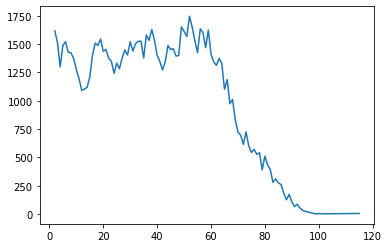

In [8]:
print("Average age is "+ str(np.mean(ns["Age"])))
age_data_fixed = ns["Age"].value_counts().sort_index(ascending = True)
display(age_data_fixed)
plt.plot(age_data_fixed)

### Create 2 variables (show, no-show), to make it easier to graph how the independent variables moves along the attendance

In [9]:
show = ns.NS == False
no_show = ns.NS == True


#print ( ns.Age[show].mean() )
#print ( ns.Age[no_show].mean() )


### Research question: Is Age variable, making any difference on no-show data?

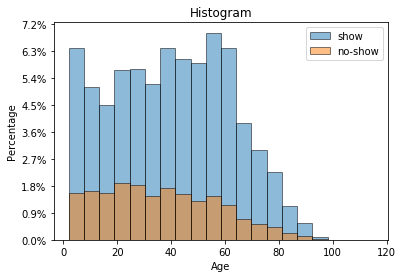

In [25]:
#Attendance histogram along age

fig, ax = plt.subplots()
ax.hist(ns.Age[show], bins = 20, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Age[no_show], bins = 20, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Age")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();


### Research question: Is Gender variable, making any difference on no-show data?

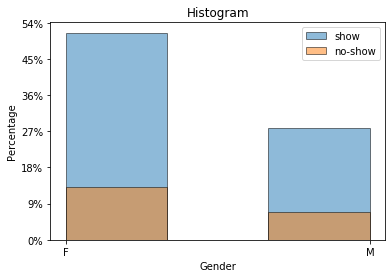

In [21]:
#Attendance histogram along gender

fig, ax = plt.subplots()
ax.hist(ns.Gender[show], bins = 3, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Gender[no_show], bins = 3, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

### Research question: Is distance variable, making any difference on no-show data?

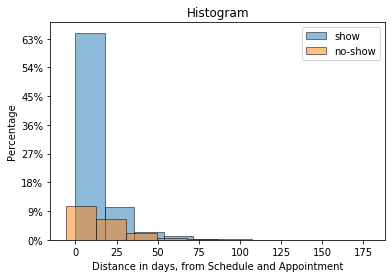

In [20]:
#Attendance histogram along distance from scheduling and appointment

fig, ax = plt.subplots()
ax.hist(ns.distance[show], bins = 10, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.distance[no_show], bins = 10, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Distance in days, from Schedule and Appointment")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

##### Considering that few days from schedule and appointment date, we're talking about an emergency or complex health issue. And from day 25 and more, those cases are programmed revision or check of health status. There is a lot of show status in the urgency appointments (about 63%), but there is a considering no-show events, and similar to the "show" ones, between 8% and 9%.

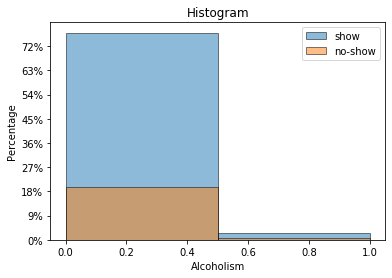

In [41]:
#Attendance histogram along alcoholism

fig, ax = plt.subplots()
ax.hist(ns.Alcoholism[show], bins = 2, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Alcoholism[no_show], bins = 2, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Alcoholism")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

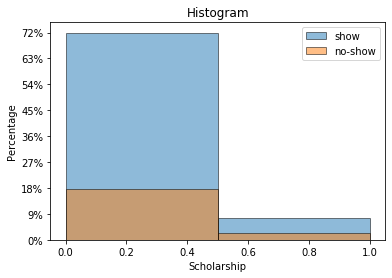

In [40]:
## Attendance histogram along Scholarship

fig, ax = plt.subplots()
ax.hist(ns.Scholarship[show], bins = 2, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Scholarship[no_show], bins = 2, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Scholarship")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

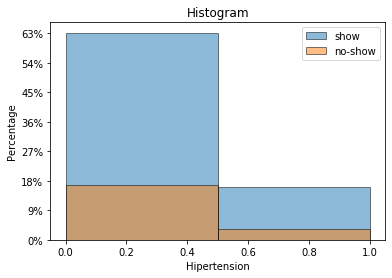

In [37]:
#Attendance histogram along Hipertension

fig, ax = plt.subplots()
ax.hist(ns.Hipertension[show], bins = 2, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Hipertension[no_show], bins = 2, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Hipertension")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

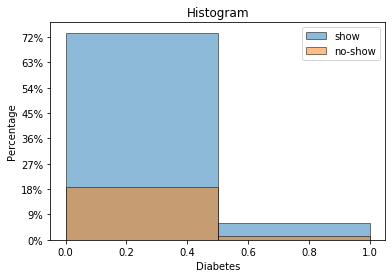

In [36]:
#Attendance histogram along Diabetes

fig, ax = plt.subplots()
ax.hist(ns.Diabetes[show], bins = 2, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Diabetes[no_show], bins = 2, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Diabetes")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

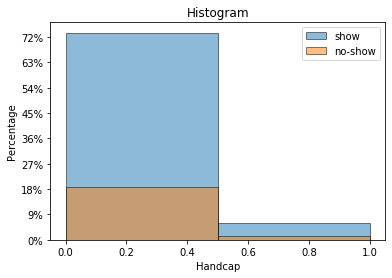

In [35]:
#Attendance histogram along Handcap

fig, ax = plt.subplots()
ax.hist(ns.Diabetes[show], bins = 2, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.Diabetes[no_show], bins = 2, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("Handcap")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

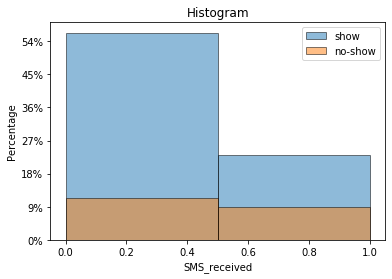

In [34]:
#Attendance histogram along SMS_received

fig, ax = plt.subplots()
ax.hist(ns.SMS_received[show], bins = 2, alpha = 0.5, label="show", edgecolor='black')
ax.hist(ns.SMS_received[no_show], bins = 2, alpha = 0.5, label="no-show", edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("SMS_received")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(ns)))
plt.legend();

#### People recieving a SMS notification has very similar percentage (about 9%) of no-show events. It can say that the notification to health appointments doesn't make any difference in those patients.